In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Opening file

with open("userssharedsdfschoolimprovement2010grants.csv", "r") as f:
    data = f.readlines()

In [4]:
# Defining the columns
columns = data[0]
columns

'School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location\n'

In [5]:
# Analyzing
data[1:22]

data[1:22:3]

['HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,$471014.00,Transformation,"200 MAIN ST\n',
 'AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,$520579.00,Transformation,"AKIACHAK 51100\n',
 'GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,$449592.00,Transformation,"169 MAIN ST\n',
 'BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$641184.00,Transformation,"1775 WEST PARKS HWY\n',
 'AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,$399686.00,Transformation,"AKIAK 5227\n',
 'MIDVALLEY HIGH,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$697703.00,Restart,"7362 WEST PARKS HWY 725\n',
 'TULUKSAK SCHOOL,TULUKSAK,AK,YUPIIT SCHOOL DISTRICT,$427658.00,Transformation,"TULUKSAK 115\n']

In [6]:
data[2:22:3]

['SAVOONGA, AK 99769\n',
 'AKIACHAK, AK 99551\n',
 'GAMBELL, AK 99742\n',
 'WASILLA, AK 99654\n',
 'AKIAK, AK 99552\n',
 'WASILLA, AK 99654\n',
 'TULUKSAK, AK 99679\n']

In [7]:
data[3:22:3]

['(63.6687, -170.603)"\n',
 '(60.8911, -161.376)"\n',
 '(63.7413, -171.689)"\n',
 '(61.5794, -149.495)"\n',
 '(60.8879, -161.2)"\n',
 '(61.5023, -149.796)"\n',
 '(61.1001, -160.961)"\n']

In [7]:
# Cleaning up so each record is on 1 line

records = []

for part_1, part_2, part_3 in zip(data[1::3], data[2::3], data[3::3]):
    record = (part_1 + part_2 + part_3).replace("\n","")
    
    records.append(record)

In [8]:
len(records)

831

In [9]:
records[0:10]

['HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,$471014.00,Transformation,"200 MAIN STSAVOONGA, AK 99769(63.6687, -170.603)"',
 'AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,$520579.00,Transformation,"AKIACHAK 51100AKIACHAK, AK 99551(60.8911, -161.376)"',
 'GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,$449592.00,Transformation,"169 MAIN STGAMBELL, AK 99742(63.7413, -171.689)"',
 'BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$641184.00,Transformation,"1775 WEST PARKS HWYWASILLA, AK 99654(61.5794, -149.495)"',
 'AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,$399686.00,Transformation,"AKIAK 5227AKIAK, AK 99552(60.8879, -161.2)"',
 'MIDVALLEY HIGH,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$697703.00,Restart,"7362 WEST PARKS HWY 725WASILLA, AK 99654(61.5023, -149.796)"',
 'TULUKSAK SCHOOL,TULUKSAK,AK,YUPIIT SCHOOL DISTRICT,$427658.00,Transformation,"TULUKSAK 115TULUKSAK, AK 99679(61.1001, -160.961)"',
 'CA

In [12]:
records = [(x+y+z).replace("\n","") for x,y,z in zip(data[1::3], data[2::3], data[3::3])]

In [21]:
# Getting records from Philadelphia City SD
dataset = {
    "SCHOOL_NAME": [],
    "AMOUNT": [],
    "MODEL": []
}

for record in records:
    if "PHILADELPHIA CITY SD" in record:
        fields = record.split(",")
        school_name = fields[0]
        amount = float(fields[4][1:])
        model = fields[5]
        
        dataset["SCHOOL_NAME"].append(school_name)
        dataset["AMOUNT"].append(amount)
        dataset["MODEL"].append(model)
        
dataset

{'SCHOOL_NAME': ['SAYRE WILLIAM L MS',
  'KING MARTIN LUTHER HS',
  'DOUGLAS STEPHEN A SCH',
  'LOCKE ALAIN SCH',
  'ALCORN JAMES SCH',
  'GERMANTOWN HS',
  'ROXBOROUGH HS',
  'UNIVERSITY CITY HS',
  'SMEDLEY FRANKLIN SCH',
  'WEST PHILADELPHIA HS',
  'HARRITY WILLIAM F SCH',
  'FRANKFORD HS',
  'VAUX ROBERTS HS',
  'CLEMENTE ROBERTO MS',
  'FELS SAMUEL HS',
  'ALLEN DR ETHEL SCH',
  'FELTONVILLE INTERMEDIATE SCHOOL',
  'SOUTH PHILADELPHIA HS',
  'OLNEY HS WEST',
  'EDISON HS/FAREIRA SKILLS',
  'STETSON JOHN B MS',
  'DAROFF SAMUEL SCH',
  'BLUFORD GUION EL SCH',
  'CLYMER GEORGE SCH',
  'MANN WILLIAM B SCH',
  'GRATZ SIMON HS',
  'LINCOLN HS'],
 'AMOUNT': [737032.0,
  786964.0,
  319320.0,
  390938.0,
  338726.0,
  798792.0,
  641440.0,
  923999.0,
  362773.0,
  671142.0,
  980283.0,
  792001.0,
  466665.0,
  333327.0,
  974132.0,
  247020.0,
  244855.0,
  579958.0,
  272245.0,
  1.0,
  888708.0,
  658247.0,
  907129.0,
  392068.0,
  794021.0,
  508486.0,
  14.0],
 'MODEL': ['Transfor

In [23]:
sum(dataset["AMOUNT"])

15010286.0

In [23]:
dataset

{'SCHOOL_NAME': ['SAYRE WILLIAM L MS',
  'KING MARTIN LUTHER HS',
  'DOUGLAS STEPHEN A SCH',
  'LOCKE ALAIN SCH',
  'ALCORN JAMES SCH',
  'GERMANTOWN HS',
  'ROXBOROUGH HS',
  'UNIVERSITY CITY HS',
  'SMEDLEY FRANKLIN SCH',
  'WEST PHILADELPHIA HS',
  'HARRITY WILLIAM F SCH',
  'FRANKFORD HS',
  'VAUX ROBERTS HS',
  'CLEMENTE ROBERTO MS',
  'FELS SAMUEL HS',
  'ALLEN DR ETHEL SCH',
  'FELTONVILLE INTERMEDIATE SCHOOL',
  'SOUTH PHILADELPHIA HS',
  'OLNEY HS WEST',
  'EDISON HS/FAREIRA SKILLS',
  'STETSON JOHN B MS',
  'DAROFF SAMUEL SCH',
  'BLUFORD GUION EL SCH',
  'CLYMER GEORGE SCH',
  'MANN WILLIAM B SCH',
  'GRATZ SIMON HS',
  'LINCOLN HS'],
 'AMOUNT': [737032.0,
  786964.0,
  319320.0,
  390938.0,
  338726.0,
  798792.0,
  641440.0,
  923999.0,
  362773.0,
  671142.0,
  980283.0,
  792001.0,
  466665.0,
  333327.0,
  974132.0,
  247020.0,
  244855.0,
  579958.0,
  272245.0,
  1.0,
  888708.0,
  658247.0,
  907129.0,
  392068.0,
  794021.0,
  508486.0,
  14.0],
 'MODEL': ['Transfor

In [25]:
mean = sum(dataset["AMOUNT"])/len(dataset["AMOUNT"])
squared_diff = []
for i in dataset["AMOUNT"]:
    new_val = (i - mean)**2
    squared_diff.append(new_val)

stdev = (sum(squared_diff)/len(squared_diff))**0.5
print(stdev)

282765.19336621836


In [29]:
# Analysis Summary

print("Number of Schools: ", len(dataset["SCHOOL_NAME"]))
print("Mean Funding Amount: ", sum(dataset["AMOUNT"])/len(dataset["SCHOOL_NAME"]))
print("Standard Deviation of Funding Amount: ", stdev)
print("Minimum Funding Amount: ", min(dataset["AMOUNT"]))
print("Maximum Funding Amount: ", max(dataset["AMOUNT"]))

Number of Schools:  27
Mean Funding Amount:  555936.5185185185
Standard Deviation of Funding Amount:  282765.19336621836
Minimum Funding Amount:  1.0
Maximum Funding Amount:  980283.0


In [32]:
# Using Pandas

file = pd.read_csv("userssharedsdfschoolimprovement2010grants.csv")
file.head()

,School Name,City,State,District Name,2010/11/Award Amount,Model Selected,Location
0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,$471014.00,Transformation,"200 MAIN ST\nSAVOONGA, AK 99769\n(63.6687, -17..."
1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,$520579.00,Transformation,"AKIACHAK 51100\nAKIACHAK, AK 99551\n(60.8911, ..."
2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,$449592.00,Transformation,"169 MAIN ST\nGAMBELL, AK 99742\n(63.7413, -171..."
3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,$641184.00,Transformation,"1775 WEST PARKS HWY\nWASILLA, AK 99654\n(61.57..."
4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,$399686.00,Transformation,"AKIAK 5227\nAKIAK, AK 99552\n(60.8879, -161.2)"


In [33]:
# Data types of dimensions

file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 7 columns):
School Name             831 non-null object
City                    831 non-null object
State                   831 non-null object
District Name           831 non-null object
2010/11/Award Amount    757 non-null object
Model Selected          825 non-null object
Location                831 non-null object
dtypes: object(7)
memory usage: 45.5+ KB


In [34]:
file["Model Selected"].value_counts()

Transformation    608
Turnaround        168
Restart            33
Closure            16
Name: Model Selected, dtype: int64

In [35]:
file.State.describe()

count     831
unique     50
top        CA
freq       92
Name: State, dtype: object

In [36]:
# Looking at funding type breakdown by state
pd.crosstab(file.State, file["Model Selected"])

Model Selected,Closure,Restart,Transformation,Turnaround
State,,,,
AK,0,1,6,0
AL,0,0,11,0
AR,0,0,7,0
AZ,0,0,12,7
CA,2,5,56,29
CO,3,1,9,6
CT,0,1,7,6
DC,0,3,3,4
DE,0,0,2,0


In [37]:
#Renaming Columns for simplicity
file = file.rename(columns={'2010/11/Award Amount':'Amount'})

# Reformatting amount values
file.Amount = file.Amount.str.replace('$','')

# Converting Amount to an integer
file['Amount'] = file.Amount.astype(float)

In [38]:
file.dtypes

School Name        object
City               object
State              object
District Name      object
Amount            float64
Model Selected     object
Location           object
dtype: object

In [42]:
# ETL

philly_district = file.loc[file['District Name'] == 'PHILADELPHIA CITY SD']

# Getting Philadelphia City SD Funding Details again
philly_district['Amount'].describe()

count        27.000000
mean     555936.518519
std      288151.681054
min           1.000000
25%      336026.500000
50%      579958.000000
75%      793011.000000
max      980283.000000
Name: Amount, dtype: float64

In [43]:
transformation = file.loc[file['Model Selected'] == 'Transformation']
restart = file.loc[file['Model Selected'] == 'Restart']
turnaround = file.loc[file['Model Selected'] == 'Turnaround']
closure = file.loc[file['Model Selected'] == 'Closure']
file["Model Selected"].value_counts()

Transformation    608
Turnaround        168
Restart            33
Closure            16
Name: Model Selected, dtype: int64

In [44]:
# Checking for accuracy
print(len(transformation))
print(len(turnaround))
print(len(restart))
print(len(closure))

608
168
33
16


In [45]:
# Funding stats for each model
transformation['Amount'].describe()

count       543.000000
mean     434116.062615
std      287908.462288
min           1.000000
25%      166273.000000
50%      441740.000000
75%      687320.500000
max      997852.000000
Name: Amount, dtype: float64

In [46]:
transformation['Amount'].describe()

count       543.000000
mean     434116.062615
std      287908.462288
min           1.000000
25%      166273.000000
50%      441740.000000
75%      687320.500000
max      997852.000000
Name: Amount, dtype: float64

In [47]:
restart['Amount'].describe()

count        33.000000
mean     503412.424242
std      294183.676162
min       17529.000000
25%      189201.000000
50%      517340.000000
75%      730689.000000
max      980283.000000
Name: Amount, dtype: float64

In [48]:
closure['Amount'].describe()

count        16.000000
mean      75155.500000
std       93610.918355
min        5000.000000
25%       11546.750000
50%       47958.500000
75%       61330.000000
max      300000.000000
Name: Amount, dtype: float64

In [49]:
# Plotting the data using Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.plotly as py
init_notebook_mode(connected=True)

In [50]:
group_model = file.groupby('Model Selected')
model_counts = group_model.size()

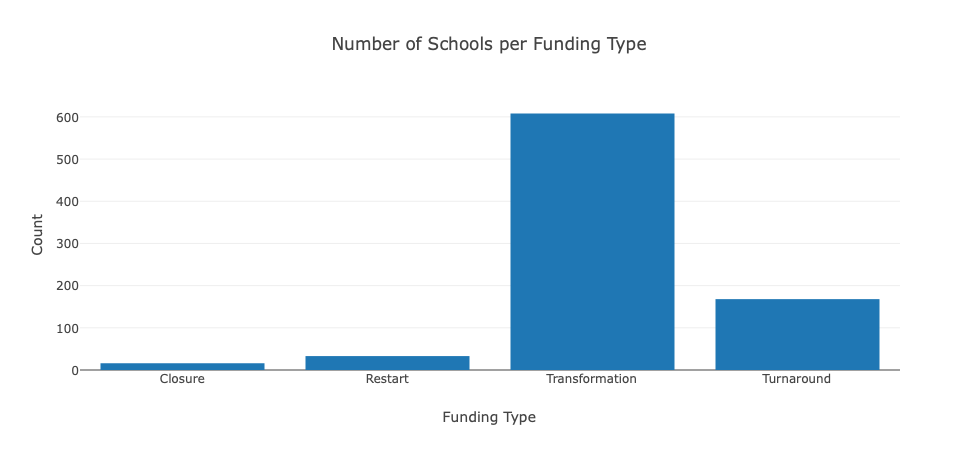

In [51]:
iplot(
    go.Figure(
        data = [
            go.Bar(x= model_counts.index, y = model_counts),
        ],
    
        layout = go.Layout(
            title = "Number of Schools per Funding Type",
            xaxis = dict(title="Funding Type"),
            yaxis = dict(title="Count")
        )
))

In [52]:
y0 = transformation['Amount']
y1 = turnaround['Amount']
y2 = restart['Amount']
y3 = closure['Amount']

transformation_plot = go.Box(
    y = y0,
    name = "Transformation"
)

turnaround_plot = go.Box(
    y = y1,
    name = "Turnaround"
)

restart_plot = go.Box(
    y = y2,
    name = "Restart"
)

closure_plot = go.Box(
    y = y3,
    name = "Closure"
)

data = [transformation_plot, turnaround_plot, restart_plot, closure_plot]

layout = go.Layout(
    title="Box Plot of Different Funding Types",
    xaxis=dict(title="Funding Type"),
    yaxis=dict(title="Funding Amount ($)")
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [54]:
# Analyzing the breakdown of funding ranges
range_labels = pd.Series(data=['<$1k', '$1-10k', '$10-50k', '$50-100k', '$100-250k', '$250-500k', '>$500k'])

In [55]:
df = file.drop(columns=['City', 'Location'])
df['Range'] = ''

pd.options.mode.chained_assignment = None

for index, row in df.iterrows():
    if (row['Amount'] < 1000):
        df['Range'][index] = range_labels[0]
    elif ((row['Amount'] >= 1000) & (row['Amount'] < 10000)):
        df['Range'][index] = range_labels[1]
    elif ((row['Amount'] >= 10000) & (row['Amount'] < 50000)):
        df['Range'][index] = range_labels[2]
    elif ((row['Amount'] >= 50000) & (row['Amount'] < 100000)):
        df['Range'][index] = range_labels[3]
    elif ((row['Amount'] >= 100000) & (row['Amount'] < 250000)):
        df['Range'][index] = range_labels[4]
    elif ((row['Amount'] >= 250000) & (row['Amount'] < 500000)):
        df['Range'][index] = range_labels[5]
    elif (row['Amount'] >= 500000):
        df['Range'][index] = range_labels[6]
    else:
        df['Range'][index] = "N/A"

In [56]:
group_range = df.groupby('Range')
range_counts = group_range.size()

In [57]:
transformation2 = df.loc[df['Model Selected'] == 'Transformation']
restart2 = df.loc[df['Model Selected'] == 'Restart']
turnaround2 = df.loc[df['Model Selected'] == 'Turnaround']
closure2 = df.loc[df['Model Selected'] == 'Closure']

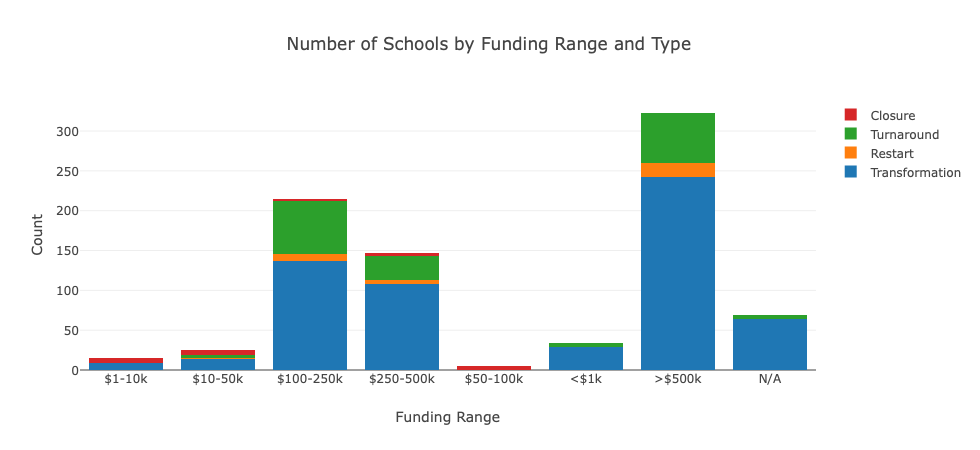

In [58]:
iplot(
    go.Figure(
        data = [
            go.Bar(x = range_counts.index, y = transformation2['Range'].value_counts()[range_counts.index], name = "Transformation"),
            go.Bar(x = range_counts.index, y = restart2['Range'].value_counts()[range_counts.index], name = "Restart"),
            go.Bar(x = range_counts.index, y = turnaround2['Range'].value_counts()[range_counts.index], name = "Turnaround"),
            go.Bar(x = range_counts.index, y = closure2['Range'].value_counts()[range_counts.index], name = "Closure"),
        ],
    
        layout = go.Layout(
            barmode='stack',
            title = "Number of Schools by Funding Range and Type",
            xaxis = dict(title="Funding Range"),
            yaxis = dict(title="Count")
        )
))

In [59]:
# Funding breakdown by state

group_state = df.groupby('State')
state_counts = group_state.size()
state_funds = df.groupby('State')['Amount'].sum()

In [60]:
state_breakdown = pd.DataFrame(columns=['State','Count','Total Funding'])
state_breakdown['State'] = state_counts.index
state_breakdown['Count'] = state_counts.values
state_breakdown['Total Funding'] = state_funds.values
state_breakdown['Average'] = round(state_breakdown['Total Funding']/state_breakdown['Count'],2)
state_table = state_breakdown.sort_values(by=['Average'], ascending=False)

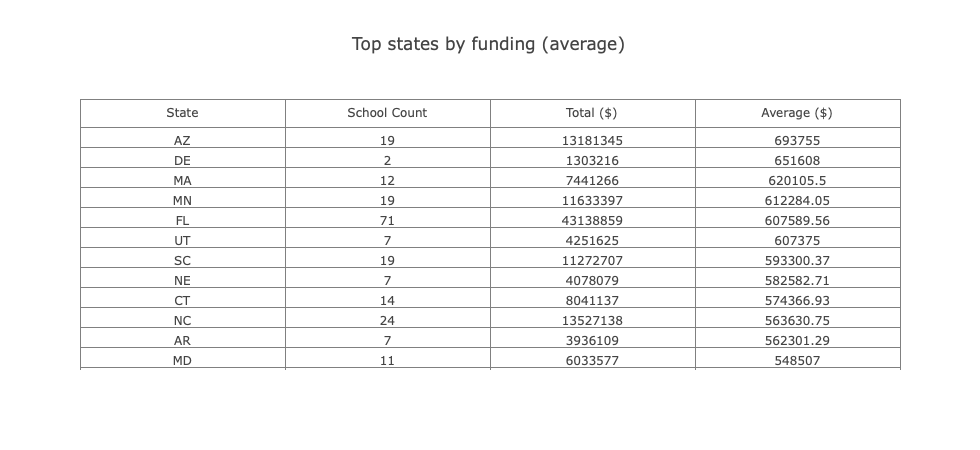

In [61]:
iplot(
    go.Figure(
        data = [
            go.Table(
                header = dict(values=["State", "School Count", "Total ($)", "Average ($)"]),
                cells = dict(values=[state_table['State'],state_table['Count'],state_table['Total Funding'],state_table['Average']])
            )
        ],
        layout = go.Layout(title = "Top states by funding (average)")
    )
)